In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from salishsea_tools import evaltools as et

%matplotlib inline

In [2]:
df=et.loadPSFCTD()

3.894 34.086
5.35 32.915
1.504 32.291


In [3]:
# path to model files:
PATH= '/results/SalishSea/nowcast-green.201812/'

# start and end dates for analysis:
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,1,1)

# number of days per model file:
flen=1

# dictionary mapping desired model variables to the file types where they are found
filemap={'vosaline':'grid_T','votemper':'grid_T'}

# dictionary mapping model file types to their time resolution in hours (1 is hourly files, 24 is daily)
fdict={'ptrc_T':1,'grid_T':1}

# results format
# -- nowcast: files like 01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc
# -- long: files like SalishSea_1h_20150206_20150804_ptrc_T_20150427-20150506.nc, all in one directory
namfmt='nowcast'

data=et.matchData(df,filemap,fdict,start_date,end_date,namfmt,PATH,flen,preIndexed=False)

(Lat,Lon)= 0.0 0.0  not matched to domain
(Lat,Lon)= 48.44 -123.34  not matched to domain
(Lat,Lon)= 48.44 -123.32  not matched to domain
(Lat,Lon)= 48.46 -123.34  not matched to domain
(Lat,Lon)= 49.29 -124.4598  not matched to domain
(Lat,Lon)= 49.2909 -124.3619  not matched to domain
(Lat,Lon)= 49.2915 -124.3626  not matched to domain
(Lat,Lon)= 49.855 -123.363333  not matched to domain
progress: 0.0%
progress: 1.067616418232326%
progress: 2.135232836464652%
progress: 3.2028492546969787%
progress: 4.270465672929304%
progress: 5.33808209116163%
progress: 6.405698509393957%
progress: 7.473314927626283%
progress: 8.540931345858608%
progress: 9.608547764090936%
progress: 10.67616418232326%
progress: 11.743780600555588%
progress: 12.811397018787915%
progress: 13.879013437020241%
progress: 14.946629855252565%
progress: 16.014246273484893%
progress: 17.081862691717216%
progress: 18.149479109949546%
progress: 19.217095528181872%
progress: 20.2847119464142%
progress: 21.35232836464652%
progr

Text(0.5, 1.0, '$\\Theta$ ($^{\\circ}$C)')

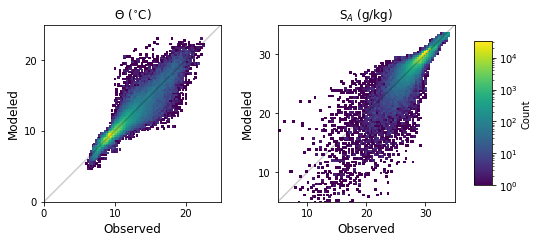

In [4]:
fig = plt.figure(figsize = (7.5,3.25))
gs1=gridspec.GridSpec(1,4,left=.08,right=.91,bottom=.1,top=.97,
                      wspace=.2,width_ratios=[1,.1,1,.1])
axT=fig.add_subplot(gs1[0,0])
axS = fig.add_subplot(gs1[0,2])
gscb=gridspec.GridSpecFromSubplotSpec(7,1,subplot_spec=gs1[:,3])
axcb = fig.add_subplot(gscb[1:-1])

axS.plot((0,36),(0,36),'k-',alpha=.2)
axT.plot((0,25),(0,25),'k-',alpha=.2)

iiT=(~np.isnan(data['CT']))&(~np.isnan(data['mod_votemper']))
iiS=(~np.isnan(data['SA']))&(~np.isnan(data['mod_vosaline']))
counts, xedges, yedges, m1=axT.hist2d(data.loc[iiT,['CT']].values.flatten(),
                                      data.loc[iiT,['mod_votemper']].values.flatten(),bins=25*3,norm=LogNorm())
counts, xedges, yedges, m2=axS.hist2d(data.loc[iiS,['SA']].values.flatten(),
                                      data.loc[iiS,['mod_vosaline']].values.flatten(),bins=36*3,norm=LogNorm())

cb=fig.colorbar(m1,cax=axcb)
cb.set_label('Count')

ntick=np.arange(0,36,10)
ntickl=[str(i) for i in ntick]
axS.set_xlim((0,36))
axS.set_ylim((0,36))
axS.set_xticks(ntick)
axS.set_xticklabels(ntickl)
axS.set_yticks(ntick)
axS.set_yticklabels(ntickl)
    
stick=np.arange(0,25,10)
stickl=[str(i) for i in stick]
axT.set_xlim((0,25))
axT.set_ylim((0,25))
axT.set_xticks(stick)
axT.set_xticklabels(stickl)
axT.set_yticks(stick)
axT.set_yticklabels(stickl)
    
for ax in (axT,axS):
    ax.set_aspect(1, adjustable='box')
    
axT.set_ylabel('Modeled',fontsize=12)
axS.set_ylabel('Modeled',fontsize=12)
axT.set_xlabel('Observed',fontsize=12)
axS.set_xlabel('Observed',fontsize=12)
axS.set_xlim(5,35)
axS.set_ylim(5,35)

axS.set_title('S$_A$ (g/kg)',fontsize=12)
axT.set_title('$\Theta$ ($^{\circ}$C)',fontsize=12)



In [6]:
data.keys()

Index(['ID', 'Patrol', 'chl', 'conductivity', 'datetime', 'Z', 'Lat', 'Lon',
       'o2SAT', 'o2uM', 'pressure', 'SA', 'station', 'temperature', 'dtUTC',
       'CT', 'j', 'i', 'mod_vosaline', 'mod_votemper', 'k'],
      dtype='object')

In [8]:
data[['station','ID', 'Patrol','Lat', 'Lon','Z','dtUTC','i', 'j', 'k',
       'pressure','chl', 'o2SAT', 'o2uM', 'conductivity', 'temperature', 'SA', 
      'CT']].to_csv('/data/eolson/results/MEOPAR/oldDBs/PSFCTD.csv',index=False)

In [12]:
test=pd.read_csv('/data/eolson/results/MEOPAR/oldDBs/PSFCTD.csv')

/home/eolson/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
test

,station,ID,Patrol,Lat,Lon,Z,dtUTC,i,j,k,pressure,chl,o2SAT,o2uM,conductivity,temperature,SA,CT
0,PR-1,NaN,2,49.866525,-124.580281,1.0,2015-02-15 16:24:32,200,667,0,1.33,NaN,85.9,270.6,2.5319,8.431,23.394,8.602689
1,PR-1,NaN,2,49.866525,-124.580281,2.0,2015-02-15 16:24:32,200,667,1,1.99,NaN,85.2,264.6,2.6946,8.602,24.930,8.753593
2,PR-1,NaN,2,49.866525,-124.580281,3.0,2015-02-15 16:24:32,200,667,2,3.03,NaN,84.8,262.2,2.7500,8.636,25.469,8.779866
3,PR-1,NaN,2,49.866525,-124.580281,4.0,2015-02-15 16:24:32,200,667,3,4.04,NaN,84.5,260.8,2.7872,8.615,25.863,8.752570
4,PR-1,NaN,2,49.866525,-124.580281,5.0,2015-02-15 16:24:32,200,667,4,5.03,NaN,84.2,259.9,2.7960,8.597,25.966,8.732706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468328,BS-7,NaN,1,49.483333,-124.766667,37.0,2017-10-19 21:49:51,125,605,22,37.39,NaN,NaN,NaN,3.2862,10.025,29.801,10.107736
468329,BS-7,NaN,1,49.483333,-124.766667,38.0,2017-10-19 21:49:51,125,605,22,38.26,NaN,NaN,NaN,3.2860,10.021,29.808,10.103491
468330,BS-7,NaN,1,49.483333,-124.766667,39.0,2017-10-19 21:49:51,125,605,22,39.44,NaN,NaN,NaN,3.2860,10.007,29.816,10.089130
468331,BS-7,NaN,1,49.483333,-124.766667,40.0,2017-10-19 21:49:51,125,605,23,40.38,NaN,NaN,NaN,3.2859,10.001,29.821,10.082901


In [15]:
data.head()

,ID,Patrol,chl,conductivity,datetime,Z,Lat,Lon,o2SAT,o2uM,...,SA,station,temperature,dtUTC,CT,j,i,mod_vosaline,mod_votemper,k
0,NaN,2,NaN,2.5319,15/02/2015 16:24:32,1.0,49.866525,-124.580281,85.9,270.6,...,23.394,PR-1,8.431,2015-02-15 16:24:32,8.602689,667,200,17.300295,6.104673,0
1,NaN,2,NaN,2.6946,15/02/2015 16:24:32,2.0,49.866525,-124.580281,85.2,264.6,...,24.930,PR-1,8.602,2015-02-15 16:24:32,8.753593,667,200,25.917959,8.178636,1
2,NaN,2,NaN,2.7500,15/02/2015 16:24:32,3.0,49.866525,-124.580281,84.8,262.2,...,25.469,PR-1,8.636,2015-02-15 16:24:32,8.779866,667,200,26.043879,8.188029,2
3,NaN,2,NaN,2.7872,15/02/2015 16:24:32,4.0,49.866525,-124.580281,84.5,260.8,...,25.863,PR-1,8.615,2015-02-15 16:24:32,8.752570,667,200,26.736950,8.213362,3
4,NaN,2,NaN,2.7960,15/02/2015 16:24:32,5.0,49.866525,-124.580281,84.2,259.9,...,25.966,PR-1,8.597,2015-02-15 16:24:32,8.732706,667,200,26.997450,8.230015,4
